**1.LinkPred санг суулгах (to top)**

Эхний алхам бол, linkpred санг суулгах бөгөөд амжилттай суусан тохиолдолд уг сангын функцүүдтэй
ажиллах боломжтой болно.
Санг суулгахдаа pip ашиглаж болно.

> Add blockquote



In [ ]:
!pip install linkpred

  Preparing metadata (setup.py) ... done
  Created wheel for smokesignal: filename=smokesignal-0.7.0-py3-none-any.whl size=6030 sha256=f7f672dd17d526653b0894d55b9e4f8ee8d8c6026553ef2a8ce25bbfe7e5dda2
  Stored in directory: /root/.cache/pip/wheels/dd/61/b2/4d7520f5b9b3e236bdef080edef4420f2203711b8f9279015f
Successfully built smokesignal


**2.Таамаглах үйл явцын дараалал**

linkpred нь дараах 3-н үе шаттайгаар Холбоосыг таамаглах үйл явцыг биелүүлдэг.
1.Сүлжээгээ байгуулах - Network Loading
2.Таамаглагчаа сонгох, аппликейшн - Predictor selection and application
3.Үр дүн үнэлэх - Results evaluation

**2.A Файлаас уншиж сүлжээг байгуулах**

Эхлээд, linkpred нь файлаас графыг уншихыг шаарддаг. Бид энэ удаа Game of Thrones Season 6
(Хаадын тоглоом цуврал)-ийн ирмэгүүдийг мэдээллийг ашиглана.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import linkpred
import networkx as nx
def read_net_w(filename):
  g = nx.Graph()
  with open(filename) as f:
    f.readline()
    for l in f:
      l = l.split(",")
      g.add_edge(l[0], l[1], weight=int(l[2]))
  return g

In [ ]:
g = read_net_w(f'/content/got-data/got-s6-edges.csv')

**2.B Удирдлагагүй сургалтын таамаглагч тооцоолох**

linkpred нь 4 бүлэг удирдлагагүй сургалтын таамаглагчид өргөн хэрэглэгдэж байна. Үүнд:

**Neighborhood:**

*   AdamicAdar, AssociationStrength, CommonNeighbours, Cosine, DegreeProduct,
Jaccard, MaxOverlap, MinOverlap, NMeasure, Pearson,ResourceAllocation

**Paths:**

*   GraphDistance, Katz

**Ranking:**

*   SimRank, RootedPageRank

**Miscellanea:**

*   Community, Copy, Random

Энэ лаборатороор бид цөөн хэдэн аргыг орууллаа.
Энгийн ойлгомжтой байлгахын тулд бид сонгогдсон таамаглагч бүрт топ-5 нь үр дүнг харууллаа.

**2.B.1 Neighborhood**

Эхний хэсэг бүлэг таамаглагч бол зангилаа бүрийн хувьд холбогдох боломжтой хос оройг уг хоёр оройн
хөрш оройнуудтайгаа хэр хүчтэй сул холбогдсон байдлаас үүдэн холбоосыг
үүсэх эсэх магадлалаар олдог.
Энэ төрлийн таамаглагчид нь дараах асуултанд хариулт олохыг хичээдэг. How many friend we have to
share in order to become friends?

**Common Neighbors**

Илүү олон дундын найзуудтай бол бид найз болох магадлал өндөр байна.

In [ ]:
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges())
cn_results = cn.predict()

top = cn_results.top(5)
for edge, score in top.items():
  print(edge, score)


TOMMEN - MACE 8.0
NED - LADY_CRANE 8.0
NED - CLARENZO 8.0
MARGAERY - IZEMBARO 8.0
MARGAERY - ARYA 8.0


**Jaccard**

Топологи бүтэц болон аттрибутуудын ижил төсөөтэй байдал нь найз болох эсэхийг тодорхойлно.

In [ ]:
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
jc_results = jc.predict()

top = jc_results.top(5)
for edge, score in top.items():
  print(edge, score)


RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


**Adamic Adar**

Бидний дундын найзын тоо нь биднийг найз болох эсэхийг тодорхойлоход ашиглагдана.


In [ ]:
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
aa_results = aa.predict()

top = aa_results.top(5)
for edge, score in top.items():
  print(edge, score)

TOMMEN - MACE 3.1875572810307893
NED - LADY_CRANE 3.126371165725784
NED - CLARENZO 3.126371165725784
SANSA - ROBB 3.0966443151332466
JOFFREY - CAMELLO 2.8944937119329133


**2.B.2 Paths**

Хоёрдогч төрлийн таамаглагчид нь хос оройн хоорондын зайнаас хамаарч тэд ирээдүйд холбогдох
эсэхийг магадлаар боддог.
Энэ төрлийн таамаглагчид нь дараах асуултад хариулт олохыг хичээдэг: How distant are we?

**Katz**

Katz computes the weighted sum over all the paths between two nodes.

In [ ]:
kz = linkpred.predictors.Katz(g, excluded=g.edges())
kz_results = kz.predict()

top = kz_results.top(5)
for edge, score in top.items():
  print(edge, score)



LADY_CRANE - JAQEN 0.005571576860773001
SANSA - ALLISER_THORNE 0.004234378077202
TYRION - DAARIO 0.004145905054793999
CERSEI - BRIENNE 0.0038862606857720003
MELISANDRE - LYANNA_MORMONT 0.0035937193855959996


**Graph Distance**

Графын зай буюу Distance нь хоёр оройн хоорондын богино замын уртаар тодорхойлогдоно.

In [ ]:
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
gd_results = gd.predict()

top = gd_results.top(5)
for edge, score in top.items():
  print(edge, score)

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


**2.B.3 Ranking**

Гуравдагч бүлэг таамаглагчид нь граф дахь хос оройнуудын байрлалаас хамаарч холбогдох магадлалыг
тооцоолно.
Дараах асуултанд хариулж буй байдлаас хамаарч тодорхойлогдоно: *How similar are we?

**SimRank**

Хоёр зангилаа холбоосоор холбогдохын тул тэдгээрийн хөрш оройнууд ижил төсөөтэй байх хэрэгтэй.

In [ ]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
simrank_results = simrank.predict(c=0.5)

top = simrank_results.top(5)
for edge, score in top.items():
  print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


**2.B.4 Miscellanea**

Энэ нь холбоосыг таамаглахдаа санамсаргүй байдлаар сонгож авдаг.
linkpred groups here approaches that are commonly used as baselines.

**Random**

Санамсаргүй байдлаар таах.

In [ ]:
rnd = linkpred.predictors.Random(g, excluded=g.edges())
rnd_results = rnd.predict()

top = simrank_results.top(5)
for edge, score in top.items():
  print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


**2.C Ялгаатай таамаглагчидын харьцуулах болон үнэлэх**

Холбоосуудыг үүсэх эсэхыг таамаглахдаа бид сургалтын болон тестийн өгөгдлүүдтэй ажиллаж
шалгана. Өгөгдлөө сургалтын болон тестийн болгон хуваах шаардлагатай.

In [ ]:
import random
import itertools
from linkpred.evaluation import Pair

# Building the test network
test = read_net_w(f'/content/got-data/got-s5-edges.csv')

# Exclude test network from learning phase
training = g.copy()

 # Node set
nodes = list(g.nodes())
nodes.extend(list(test.nodes()))
# Compute the test set and the universe set
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])


Дараагаар нь бид сургалтын өгөгдөл дээрээ таамаглагчаа ажиллуулна.


In [ ]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

Тэгээд бид тестийн өгөгдлөө ашиглан таамаглагч хэр үнэн таамаглаж буй үнэлнэ.

In [ ]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

Үр дүнгүүдээ тайлбарлахдаа бид ROC -ийн муруй ашиглан дүрслэнэ

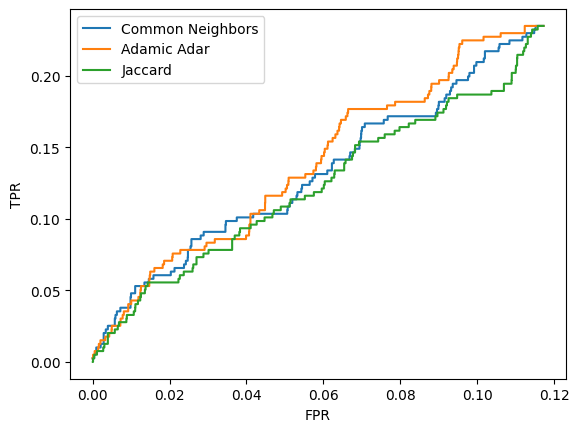

In [ ]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()

Үр дүнгээ нэгтгэн тайлбарлах, дүгнэхэд хамгийн тохиромжтой, энгийн арга нь ROC муруй болон үүн
дээр AUC бодож үзэх юм.


In [ ]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.015376333109730609
Adamic Adar: 	 0.016201171969940018
Jaccard: 	 0.01430571353574241


**Даалгавар:**

1. Jaccard болон Adamic Adar хоёр яагаад ялгаатай үр дүн үзүүлж байна вэ? Тайлбарлана уу.

2. linkpred санг ашиглан desicion tree алгоритмаар холбоосыг илрүүлж болох уу.

Jaccard болон Adamic-Adar нь хоёулаа link prediction-д хэрэглэгддэг төвлөрсөн бус (local) аргачлалууд боловч тэдний тооцоолох арга өөр өөр учраас үр дүн нь ялгаатай байдаг.



Үгүй. linkpred сан дотор Decision Tree алгоритм бүрэлдэхүүнд байхгүй.

🛠 linkpred юу ашигладаг вэ?
linkpred нь дараах traditional link prediction heuristics-уудыг ашигладаг:

Common Neighbors

Jaccard

Adamic-Adar

Resource Allocation

Preferential Attachment

Katz

Rooted PageRank гэх мэт

🍀 Гэхдээ... хэрвээ Decision Tree ашиглахыг хүсвэл яах вэ?
Өөрөө dataset бэлдэж:

Орой хос бүрийг нэг мөр болгож

Граф дотор байгаа эсэхийг “target” болгож

Хөршүүдийн тоо, зэрэг (degree), Jaccard score, Adamic-Adar score гэх мэт онцлог (features)-ийг бэлдэж болно.

sklearn.tree.DecisionTreeClassifier ашиглан supervised learning хийж болно.

from sklearn.tree import DecisionTreeClassifier

X = features such as Jaccard, CommonNeighbors, etc.
y = 1 if edge exists, 0 otherwise

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# X = features such as Jaccard, CommonNeighbors, etc.
# y = 1 if edge exists, 0 otherwise

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)